# Project: Spam Message Classifier (SMS)

A simple spam classifier using sms dataset from kaggle : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/code

The steps include loading data, preprocessing text, vectorizing, training a model, evaluating, and testing it.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load the Dataset

In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only relevant columns
df.columns = ['label', 'message']  # Rename columns for clarity
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Explore and Clean the Data

In [7]:
print(df.info())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
label
ham     4825
spam     747
Name: count, dtype: int64


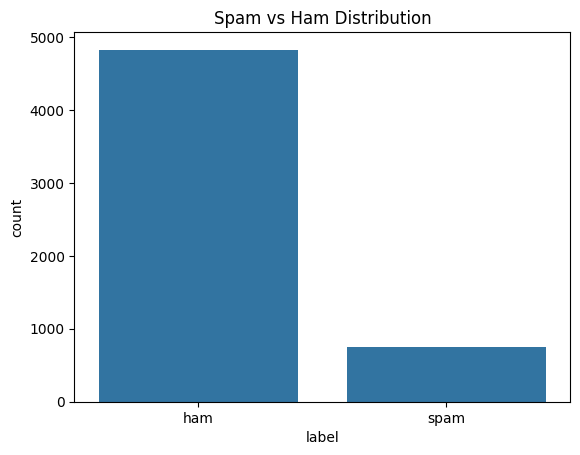

In [8]:
sns.countplot(data=df, x='label')
plt.title("Spam vs Ham Distribution")
plt.show()

## Preprocess the Text

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kn0pnine/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [12]:
df['processed_message'] = df['message'].apply(preprocess_text)
df.head()

,label,message,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


## Convert Text to Numbers (Vectorization)

In [18]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['processed_message']).toarray()

In [19]:
le = LabelEncoder()
y = le.fit_transform(df['label'])  # ham -> 0, spam -> 1

## Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Naive Bayes Classifier

In [23]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.97847533632287
[[965   0]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Predict on Custom Messages

In [24]:
def predict_message(msg):
    processed = preprocess_text(msg)
    vector = tfidf.transform([processed]).toarray()
    pred = model.predict(vector)[0]
    return "Spam" if pred else "Ham"

In [25]:
predict_message("Congratulations! You've won a free iPhone!")

'Spam'

In [26]:
predict_message("Congratulation on your wife pregnancy !")

'Ham'

In [ ]:
predict_message("I just sent you $5000")

'Ham'

In [31]:
predict_message("You are the jackpot winner !")

'Spam'